In [812]:
import pandas as pd
import numpy as np
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline  

In [813]:
df = pd.read_csv('HeartDiseaseData.csv', sep=',', index_col=0)

### Посмотрим какие типы данных представлены в нашем датасете

In [814]:
df.dtypes

ID            int64
Age           int64
Sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
num           int64
Place        object
dtype: object

для количественных перееменных (кроме ID и num) посчитаем описательные статистики

In [815]:
df = df.drop(["ID", "Place"], axis=1)

In [816]:
df.drop('num', axis=1).describe()

,Age,trestbps,chol,thalach,oldpeak
count,457.000000,424.000000,431.000000,424.000000,421.000000
mean,50.962801,131.488208,200.048724,134.910377,0.622090
std,9.219588,18.829454,113.463794,24.251177,0.922115
min,28.000000,80.000000,0.000000,69.000000,-2.600000
25%,45.000000,120.000000,171.000000,118.000000,0.000000
50%,52.000000,130.000000,220.000000,135.000000,0.000000
75%,57.000000,140.000000,269.500000,150.000000,1.000000
max,75.000000,200.000000,603.000000,190.000000,5.000000


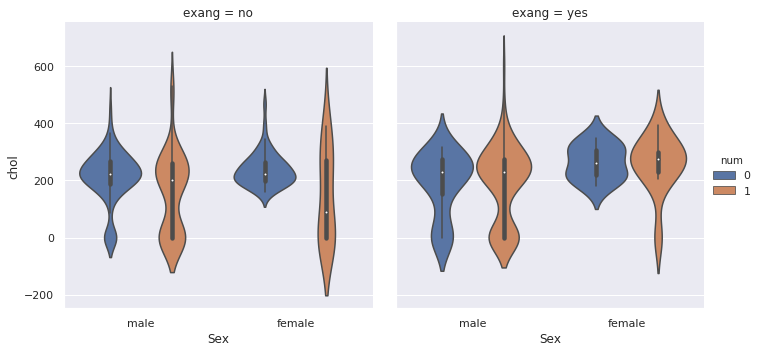

In [817]:
sns.catplot(x='Sex', y='chol', hue='num', col='exang', kind='violin', data=df)

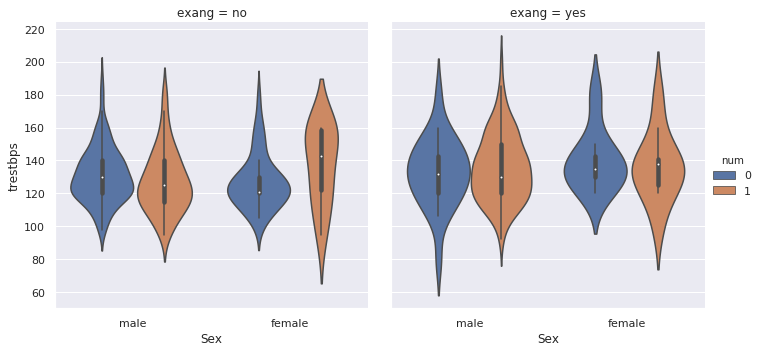

In [765]:
sns.catplot(x='Sex', y='trestbps', hue='num', col='exang', kind='violin', data=df)

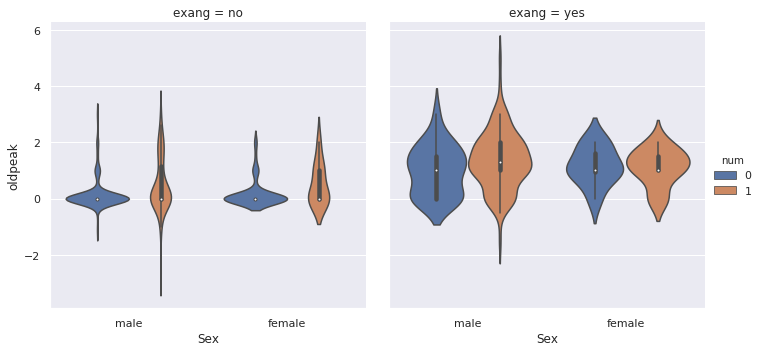

In [766]:
sns.catplot(x='Sex', y='oldpeak', hue='num', col='exang', kind='violin', data=df)

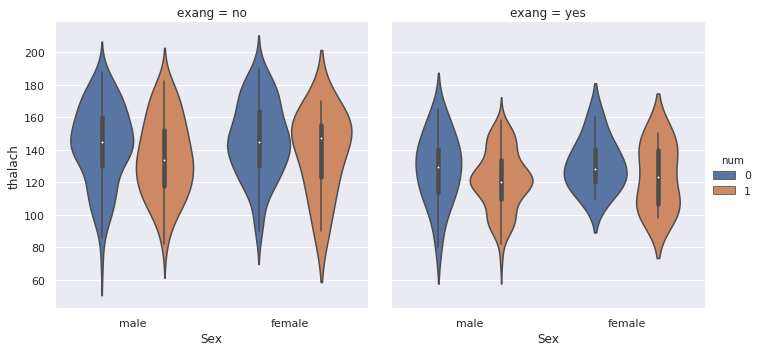

In [767]:
sns.catplot(x='Sex', y='thalach', hue='num', col='exang', kind='violin', data=df)

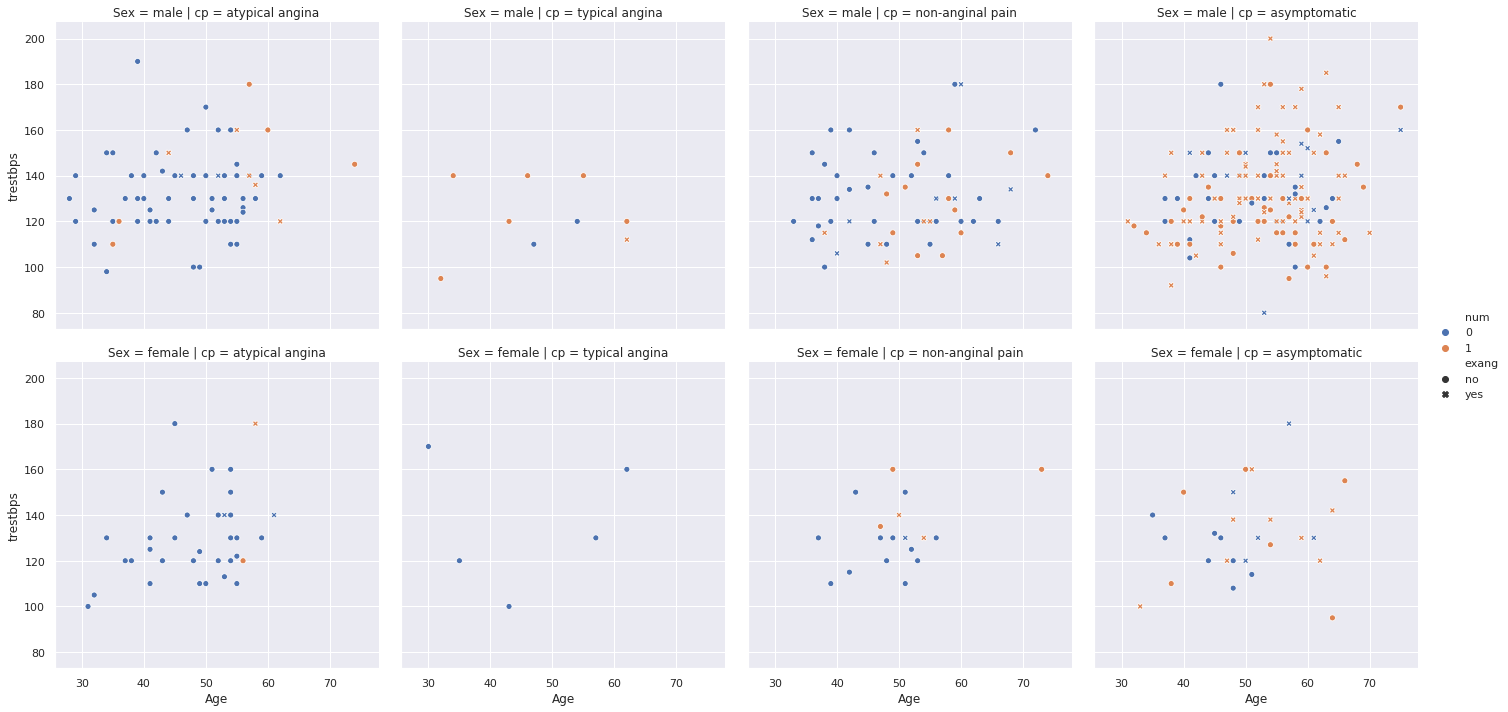

In [768]:
sns.relplot(x='Age', y='trestbps', hue='num', style='exang', col='cp', row='Sex', data=df)

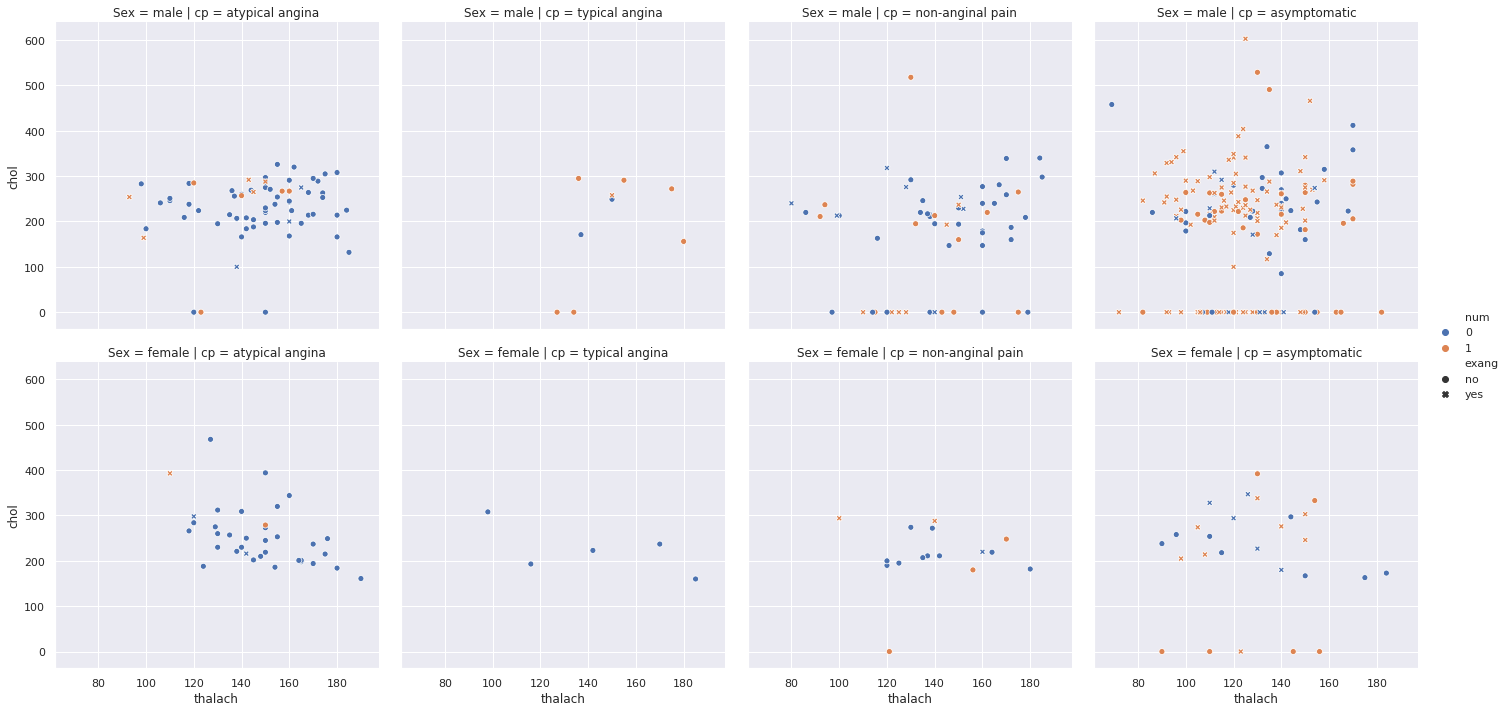

In [769]:
sns.relplot(x='thalach', y='chol', hue='num', style='exang', col='cp', row='Sex', data=df)

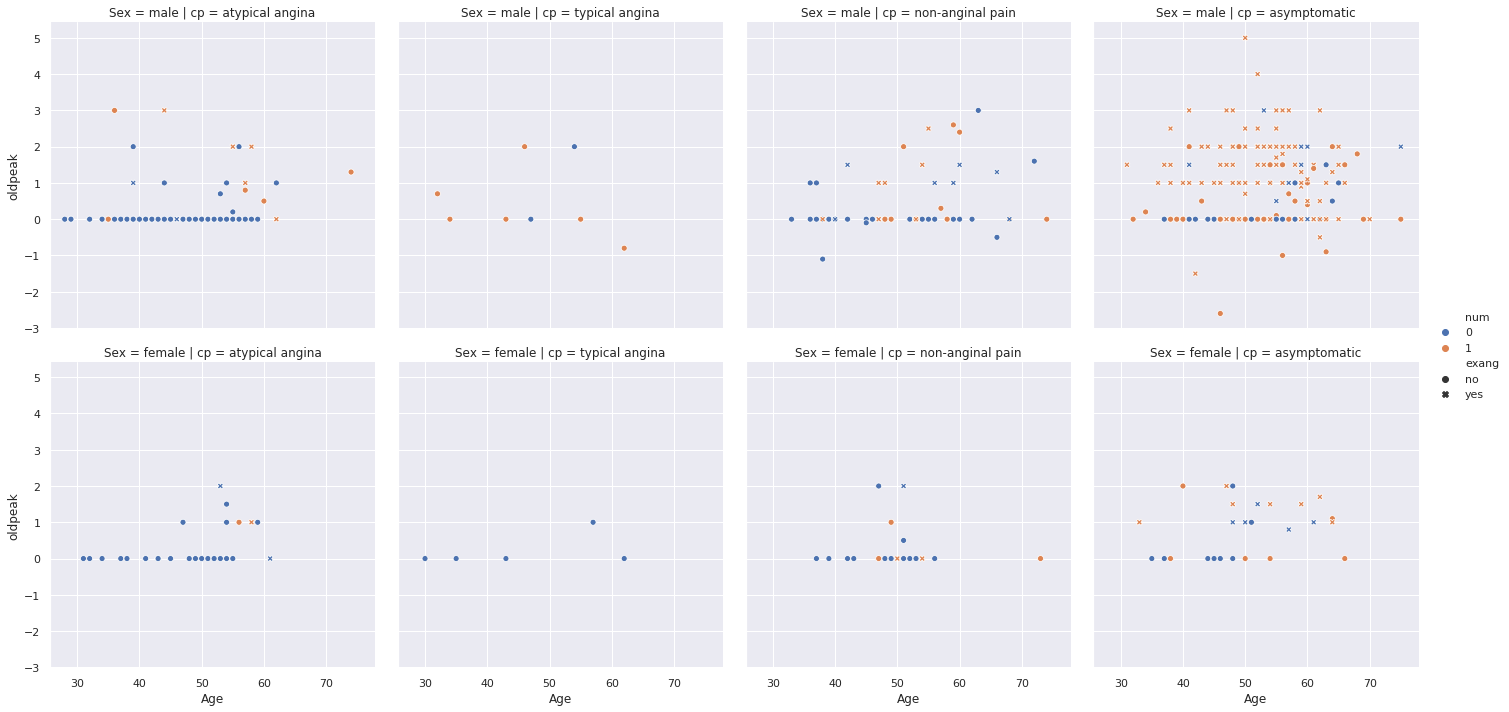

In [770]:
sns.relplot(x='Age', y='oldpeak', hue='num', style='exang', col='cp', row='Sex', data=df)

/home/polina/anaconda2/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/polina/anaconda2/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/polina/anaconda2/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/polina/anaconda2/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


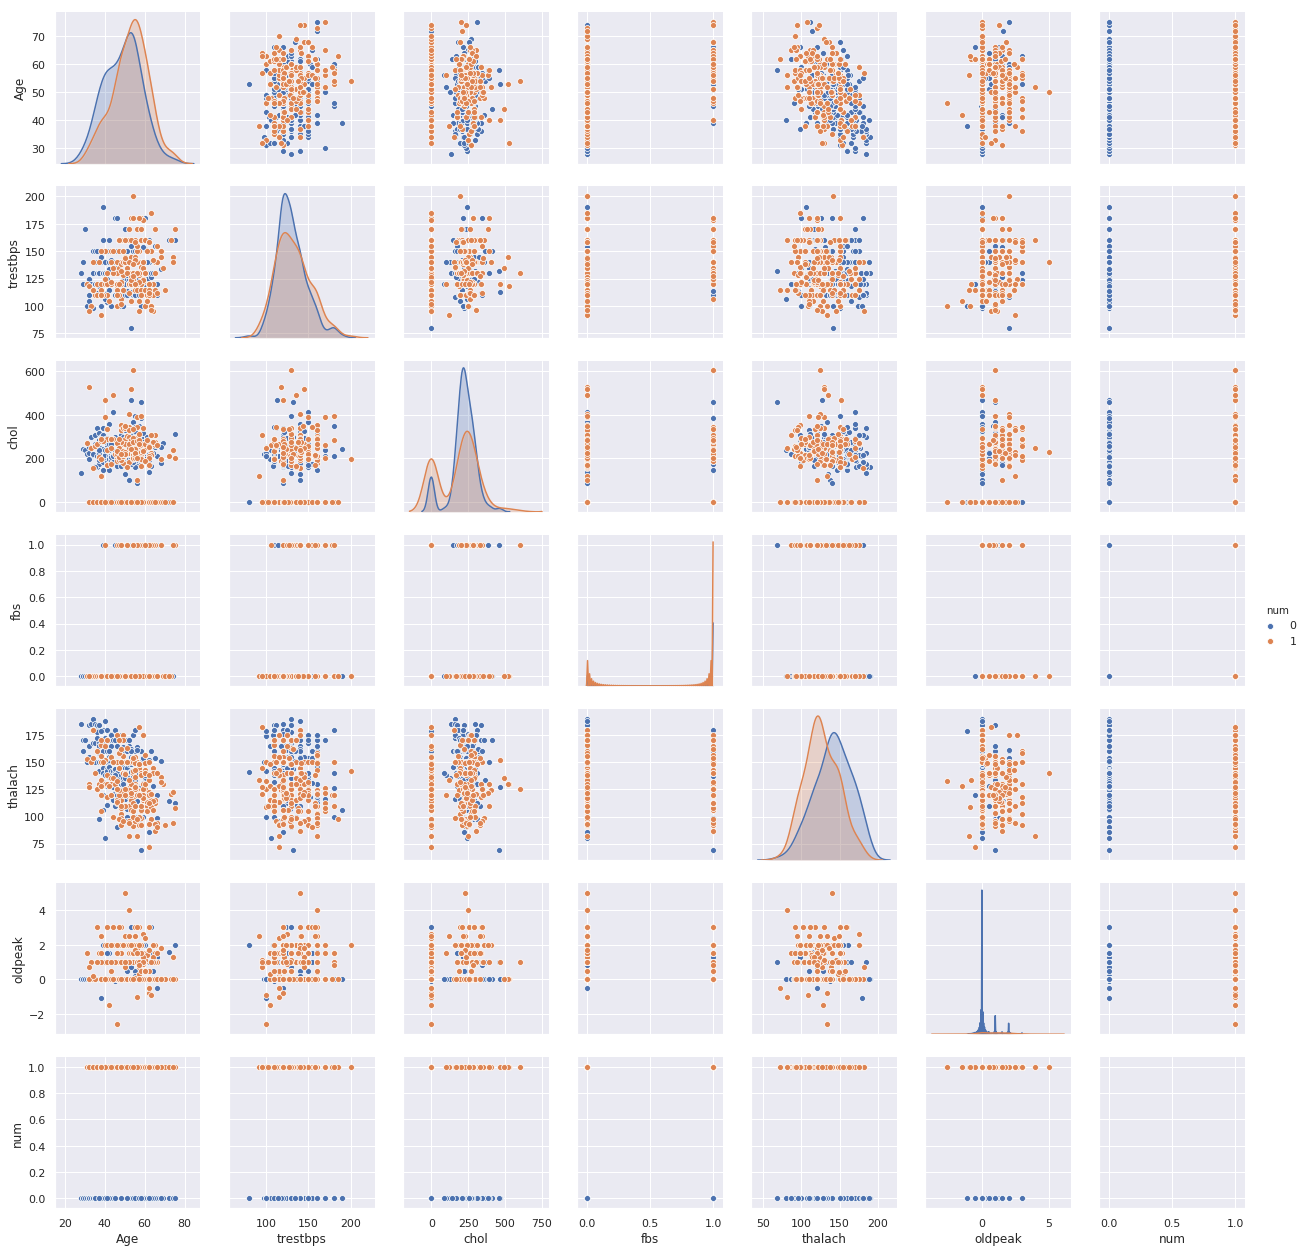

In [771]:
sns.pairplot(df, hue='num')

### Подготовим данные к обучению модели

In [818]:
df.isnull().sum()

Age          0
Sex          0
cp           0
trestbps    33
chol        26
fbs         54
restecg      2
thalach     33
exang       33
oldpeak     36
num          0
dtype: int64

Заполним пропущенные значения в столбцах trestbps, chol, thalach, oldpeak на медианные значения соответствующего столбца

In [819]:
df = df.fillna({'trestbps': X.trestbps.median(), 'chol': X.chol.median(), 'thalach': X.thalach.median(), 
              'oldpeak': X.oldpeak.median()})

In [820]:
df.isnull().sum()

Age          0
Sex          0
cp           0
trestbps     0
chol         0
fbs         54
restecg      2
thalach      0
exang       33
oldpeak      0
num          0
dtype: int64

У нас остались пропущенные значения в столбцах типа object, заполним их наиболее частым значением из соответсвующего столбца

In [821]:
df.fbs.value_counts()

False    347
True      56
Name: fbs, dtype: int64

In [822]:
df.exang.value_counts()

no     272
yes    152
Name: exang, dtype: int64

Т.е. для столбца fbs это будет False, а для exand - no

In [823]:
df = df.fillna({'fbs': False, 'exang': 'no'})

Переведем строковые данные в численный формат

In [824]:
df = pd.get_dummies(df)

In [825]:
df = df.rename(columns={'cp_atypical angina': 'cp_atypical_angina', 'cp_non-anginal pain': 'cp_non_anginal_pain', 
                       'cp_typical angina': 'cp_typical_angina', 
                       'restecg_having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV': 'restecg_having_ST_T_abnormality', 
                       'restecg_showing probable or definite left ventricular hypertrophy by Estes criteria': 'restecg_showing_left_ventricular_hypertrophy'})

In [826]:
X = df.drop("num", axis=1)
y = df.num

In [827]:
le = preprocessing.LabelEncoder()

X = X.assign(Age = le.fit_transform(X.Age), 
             Sex_female = le.fit_transform(X.Sex_female), 
             Sex_male = le.fit_transform(X.Sex_male), 
             cp_asymptomatic = le.fit_transform(X.cp_asymptomatic), 
             cp_atypical_angina = le.fit_transform(X.cp_atypical_angina), 
             cp_non_anginal_pain = le.fit_transform(X.cp_non_anginal_pain), 
             cp_typical_angina = le.fit_transform(X.cp_typical_angina),
             fbs = le.fit_transform(X.fbs), 
             restecg_having_ST_T_abnormality = le.fit_transform(X.restecg_having_ST_T_abnormality), 
             restecg_normal = le.fit_transform(X.restecg_normal), 
             restecg_showing_left_ventricular_hypertrophy = le.fit_transform(X.restecg_showing_left_ventricular_hypertrophy), 
             exang_no = le.fit_transform(X.exang_no), 
             exang_yes = le.fit_transform(X.exang_yes))

In [828]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [829]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [830]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [831]:
clf.score(X_train, y_train)

1.0

In [832]:
clf.score(X_test, y_test)

0.7218543046357616

In [833]:
max_depth_values = range(1, 50)
classifier_score_data = pd.DataFrame()

In [834]:
for max_dept in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_dept)
    clf.fit(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    train_score = clf.score(X_train, y_train)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision').mean()
    
    classifier_score_data = classifier_score_data.append(pd.DataFrame({'test_score': [test_score], 
                                                                       'train_score': [train_score], 
                                                                       'max_dept': [max_dept], 
                                                                       'mean_cross_val_score': [mean_cross_val_score]}))

In [835]:
classifier_score_data = pd.melt(classifier_score_data, id_vars=['max_dept'], var_name='set_type', value_name='score')

In [836]:
classifier_score_data.head()

,max_dept,set_type,score
0,1,test_score,0.715232
1,2,test_score,0.682119
2,3,test_score,0.695364
3,4,test_score,0.708609
4,5,test_score,0.708609


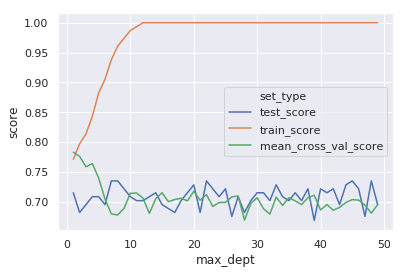

In [837]:
ax = sns.lineplot(x='max_dept', y='score', hue='set_type', data=classifier_score_data)

In [854]:
clf_ = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [855]:
cross_vals = cross_val_score(clf_, X_train, y_train, cv=5, scoring='precision')

In [856]:
cross_vals.mean()

0.7596551030668677

In [857]:
clf_.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [858]:
clf_.score(X_train, y_train)

0.8431372549019608

In [859]:
clf_.score(X_test, y_test)

0.7152317880794702

In [846]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width:60% !important;height:60% !important;}</style>"
HTML(style)

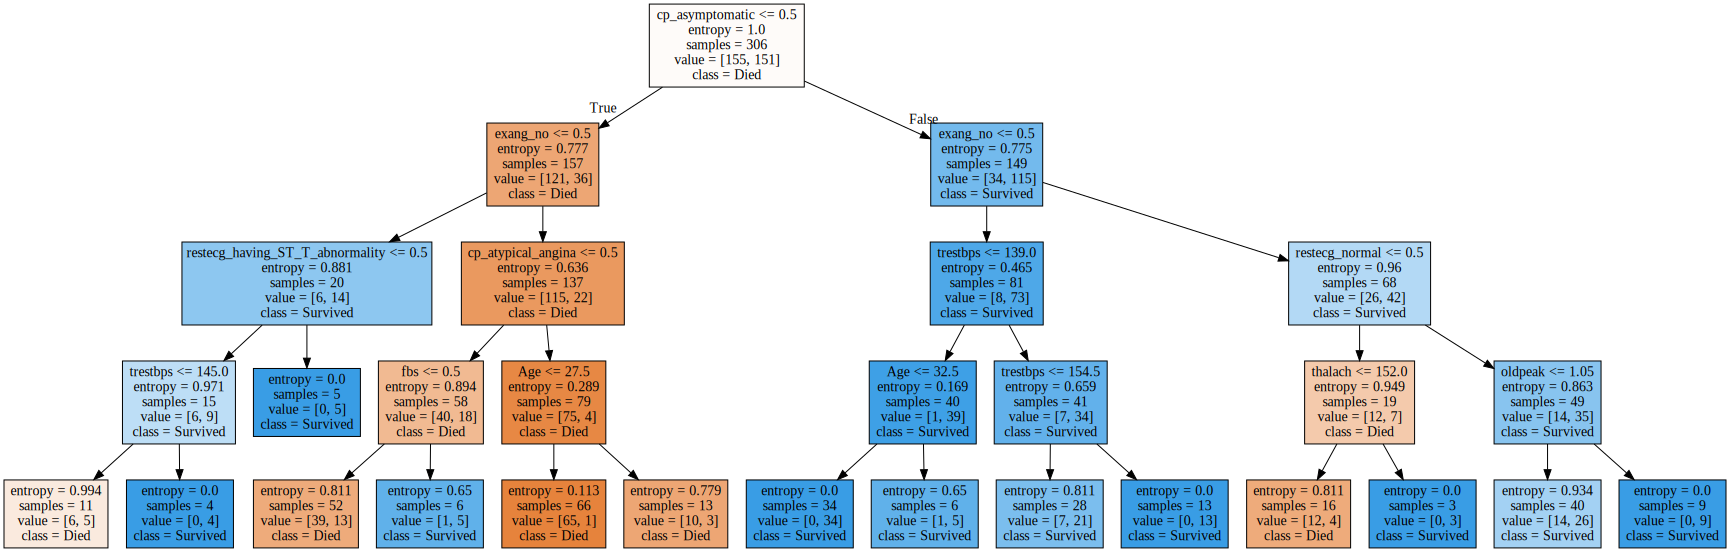

In [847]:
style = "<style>svg{width:60% !important;height:60% !important;}</style>"
HTML(style)
graph = Source(tree.export_graphviz(clf_, out_file=None
   , feature_names=list(X), class_names=['Died', 'Survived'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))